In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import os
import re


In [2]:
d = {}

for file in os.listdir('data'):
    d[file.split('.')[0]] = pd.read_csv(f'data/{file}')
print(len(d))
print(d.keys())

88
dict_keys(['1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'])


In [3]:
d['2010']

,Stage,Winner,General classification,Points classification,Mountains classification,Young rider classification
0,1,Bradley Wiggins,Bradley Wiggins,Bradley Wiggins,not awarded,Richie Porte
1,2,Tyler Farrar,Cadel Evans,Tyler Farrar,Paul Voss,Richie Porte
2,3,Wouter Weylandt,Alexander Vinokourov,Graeme Brown,Paul Voss,Richie Porte
3,4,Liquigas–Doimo,Vincenzo Nibali,Graeme Brown,Paul Voss,Valerio Agnoli
4,5,Jérôme Pineau,Vincenzo Nibali,Jérôme Pineau,Paul Voss,Valerio Agnoli
5,6,Matthew Lloyd,Vincenzo Nibali,Tyler Farrar,Matthew Lloyd,Valerio Agnoli
6,7,Cadel Evans,Alexander Vinokourov,Tyler Farrar,Matthew Lloyd,Richie Porte
7,8,Chris Anker Sørensen,Alexander Vinokourov,Cadel Evans,Matthew Lloyd,Richie Porte
8,9,Matthew Goss,Alexander Vinokourov,Tyler Farrar,Matthew Lloyd,Richie Porte
9,10,Tyler Farrar,Alexander Vinokourov,Tyler Farrar,Matthew Lloyd,Richie Porte


In [4]:
col_cnt = {}
for year in d:
    for column in d[year].columns:
        if column not in col_cnt:
            col_cnt[column] = 1
        else:
            col_cnt[column] += 1
print(sorted(col_cnt.items(), key=lambda x: x[1], reverse=True))

[('Stage', 88), ('Winner', 88), ('General classification', 88), ('Mountains classification', 86), ('Points classification', 59), ('Team classification', 57), ('Young rider classification', 37), ('Trofeo Fast Team', 18), ('Trofeo Super Team', 14), ('Intergiro classification', 13), ('Best foreign rider', 8), ('General Super Team', 7), ('Best isolati rider', 6), ('Last in General classification', 6), ('Intermediate sprint classification', 6), ('Breakaway classification', 6), ('Best independent rider', 5), ('Group classification', 5), ('Fair play classification', 5), ('Combativity classification', 4), ('Il Trofeo Magno', 3), ('Combination classification', 2), ('Combativity award', 2), ('Liberi classification', 1), ('Best Group rider classification', 1), ('Best non-industrial team rider', 1), ('Italian Team classification', 1), ('Foreign Team classification', 1), ('Trofeo Dolomiti', 1), ('Trofeo Appennini', 1), ('Points classification [24]', 1)]


Leave Stage, Winner, Gen Cl, Mount cl, Point cl, Team cl, Young cl

In [5]:
d['2000'][['Stage', 'Winner']]

,Stage,Winner
0,P,Jan Hruška
1,1,Ivan Quaranta
2,2,Cristian Moreni
3,3,Ján Svorada
4,4,Mario Cipollini
5,5,Danilo Di Luca
6,6,Dmitri Konyshev
7,7,David McKenzie
8,8,Axel Merckx
9,9,Francesco Casagrande


In [6]:
columns = [
    'Stage', 'Winner', 'General classification',
    'Mountains classification', 'Points classification',
    'Team classification', 'Young rider classification',
    'Year'
]
df = pd.DataFrame(columns=columns)

for year in d:
    year_df = d[year]
    available_columns = [col for col in columns if col in year_df.columns]
    year_df_subset = year_df[available_columns].copy()
    year_df_subset['Year'] = year
    df = pd.concat([df, year_df_subset], ignore_index=True)

print(df.head())

  Stage            Winner General classification Mountains classification  \
0     1     Learco Guerra          Learco Guerra                      NaN   
1     2      Hermann Buse           Hermann Buse                      NaN   
2     3   Fabio Battesini           Hermann Buse                      NaN   
3     4     Learco Guerra           Hermann Buse                      NaN   
4     5  Raffaele Di Paco           Hermann Buse                      NaN   

  Points classification Team classification Young rider classification  Year  
0                   NaN                   ?                        NaN  1932  
1                   NaN                   ?                        NaN  1932  
2                   NaN    Atala-Hutchinson                        NaN  1932  
3                   NaN    Atala-Hutchinson                        NaN  1932  
4                   NaN    Atala-Hutchinson                        NaN  1932  


In [7]:
df[df['Year'] == '2023']

,Stage,Winner,General classification,Mountains classification,Points classification,Team classification,Young rider classification,Year
1931,1,Remco Evenepoel,Remco Evenepoel,Tao Geoghegan Hart,Remco Evenepoel,NaN,Remco Evenepoel,2023
1932,2,Jonathan Milan,Remco Evenepoel,Paul Lapeira,Jonathan Milan,NaN,Remco Evenepoel,2023
1933,3,Michael Matthews,Remco Evenepoel,Thibaut Pinot,Jonathan Milan,NaN,Remco Evenepoel,2023
1934,4,Aurélien Paret-Peintre,Andreas Leknessund,Thibaut Pinot,Jonathan Milan,NaN,Andreas Leknessund,2023
1935,5,Kaden Groves,Andreas Leknessund,Thibaut Pinot,Jonathan Milan,NaN,Andreas Leknessund,2023
1936,6,Mads Pedersen,Andreas Leknessund,Thibaut Pinot,Jonathan Milan,NaN,Andreas Leknessund,2023
1937,7,Davide Bais,Andreas Leknessund,Davide Bais,Jonathan Milan,NaN,Andreas Leknessund,2023
1938,8,Ben Healy,Andreas Leknessund,Davide Bais,Jonathan Milan,NaN,Andreas Leknessund,2023
1939,9,Remco Evenepoel,Remco Evenepoel,Davide Bais,Jonathan Milan,NaN,Remco Evenepoel,2023
1940,10,Magnus Cort,Geraint Thomas,Davide Bais,Jonathan Milan,NaN,João Almeida,2023


### 1. General classification

In [8]:
df_gen = df[['Year', 'Stage', 'Winner', 'General classification']]
df_gen['Year'] = df_gen['Year'].astype(int)
print(len(df_gen[df_gen['Stage'] == 'Final']))
df_gen = df_gen[df_gen['Stage'] != 'Final']
df_gen

88


C:\Users\bemyp\AppData\Local\Temp\ipykernel_4448\2577566161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gen['Year'] = df_gen['Year'].astype(int)


,Year,Stage,Winner,General classification
0,1932,1,Learco Guerra,Learco Guerra
1,1932,2,Hermann Buse,Hermann Buse
2,1932,3,Fabio Battesini,Hermann Buse
3,1932,4,Learco Guerra,Hermann Buse
4,1932,5,Raffaele Di Paco,Hermann Buse
...,...,...,...,...
1969,2024,17,Georg Steinhauser,Tadej Pogačar
1970,2024,18,Tim Merlier,Tadej Pogačar
1971,2024,19,Andrea Vendrame,Tadej Pogačar
1972,2024,20,Tadej Pogačar,Tadej Pogačar


In [9]:
leaders_count_per_year = df_gen.groupby('Year')['General classification'].nunique().reset_index()
leaders_count_per_year.columns = ['Year', 'Leader Count']

leaders_count_per_year.head()


,Year,Leader Count
0,1932,3
1,1933,3
2,1934,3
3,1935,4
4,1936,4


In [10]:
grouped_by_leader_count = leaders_count_per_year.groupby('Leader Count').size().reset_index(name='Years Count')

grouped_by_leader_count

,Leader Count,Years Count
0,1,1
1,2,7
2,3,16
3,4,23
4,5,21
5,6,12
6,7,6
7,8,2


In [11]:
leaders_count_per_year[leaders_count_per_year['Leader Count'] == 1]

,Year,Leader Count
53,1990,1


In [12]:
plt.rcParams.update({
    'figure.facecolor': '#e6e6e6',
    'axes.facecolor': '#e6e6e6',
    'savefig.facecolor': '#e6e6e6'
})
def plot_leadership_timeline(df_gen, year):
    df_year = df_gen[df_gen['Year'] == year]

    stages = df_year['Stage']
    leaders = df_year['General classification']

    unique_leaders = leaders.unique()
    color_map = {leader: plt.cm.Set2(i % 8 ) for i, leader in enumerate(unique_leaders)}
    colors = [color_map[leader] for leader in leaders]

    #plt.style.use('dark_background')

    #plt.ioff()

    fig, ax = plt.subplots(figsize=(12, 2))

    ax.bar(stages, [1] * len(stages), color=colors, edgecolor='none', width=1.0, zorder=1)  # Remove edgecolor

    ax.set_yticks([])

    ax.set_xlabel('Этап', fontsize=14, color='black')
    ax.set_title(f"Giro d'Italia {year} - Лидерство по этапам", fontsize=16, color='black')

    final_leader = leaders.iloc[-1]
    ax.text(1.05, 1.10, f"Победитель: {final_leader}", ha='left', va='top', fontsize=10, color='black', transform=ax.transAxes)

    for spine in ax.spines.values():
        spine.set_visible(False)

    #ax.grid(True, color='kacj', linestyle='--', linewidth=0.5)

    handles = [plt.Rectangle((0,0),1,1, color=color_map[leader]) for leader in unique_leaders]
    ax.legend(handles, unique_leaders, bbox_to_anchor=(1.05, 1), loc='upper left', title='Лидер', fontsize=10).get_frame().set_edgecolor('black')
    #ax.legend.get_frame().set_linewidth(2)

    ax.grid(True, color='black', linestyle='--', linewidth=0.5, zorder=3)

    #ax.set_axisbelow(False)
    plt.tight_layout()
    plt.savefig(f'graphs/general classification/{year}.png', format='png', dpi=300)

    #plt.close(fig)
    plt.show()


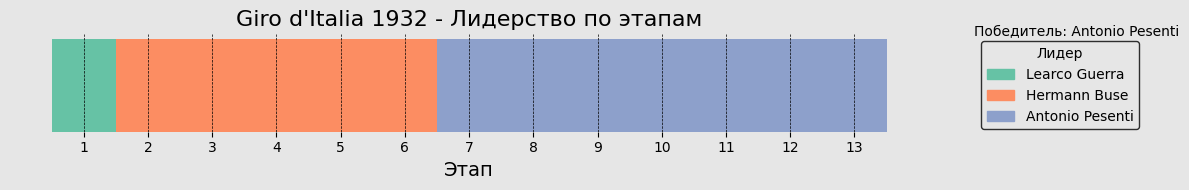

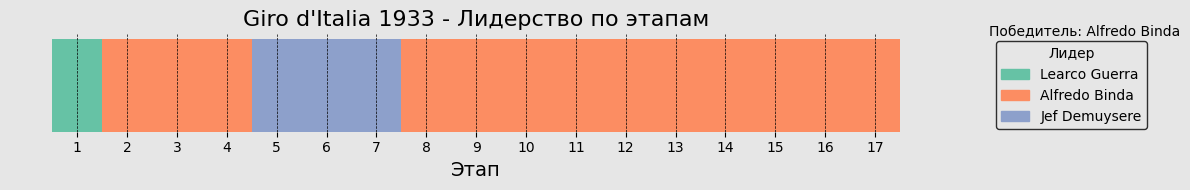

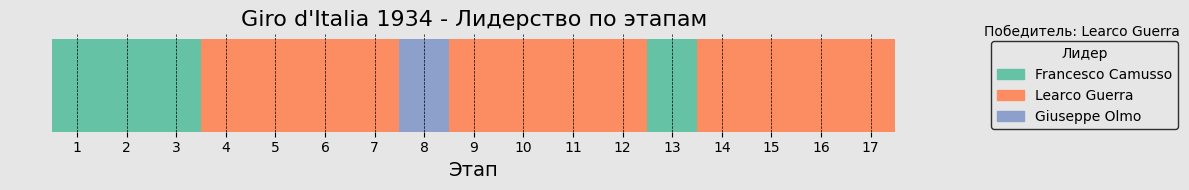

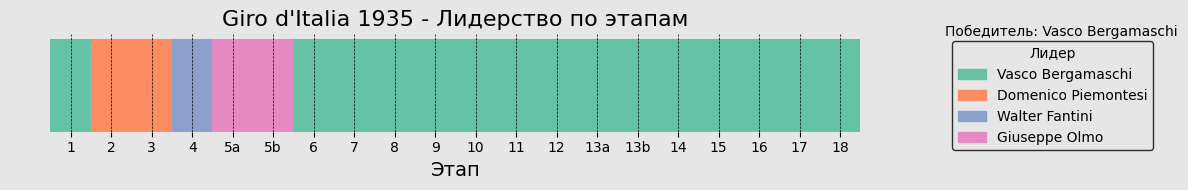

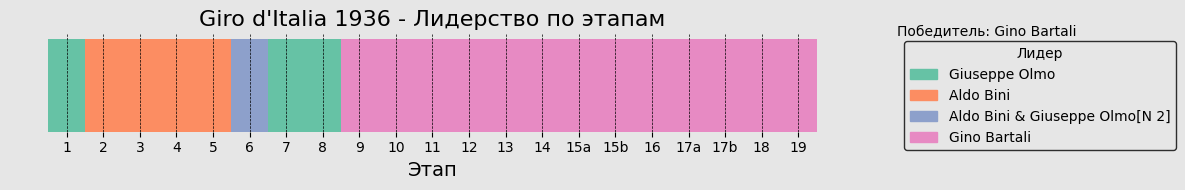

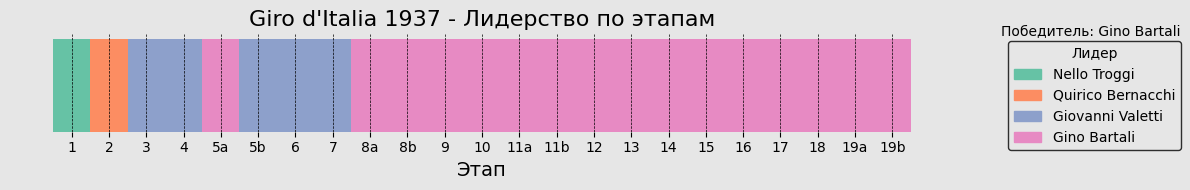

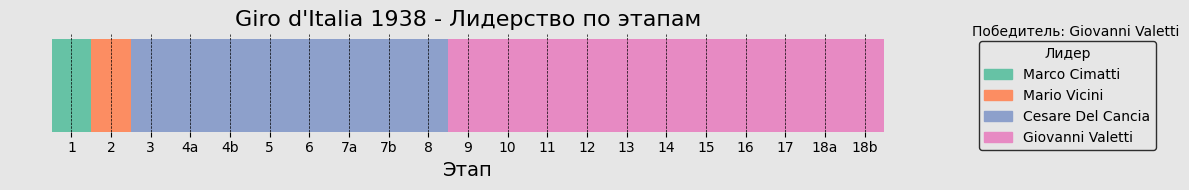

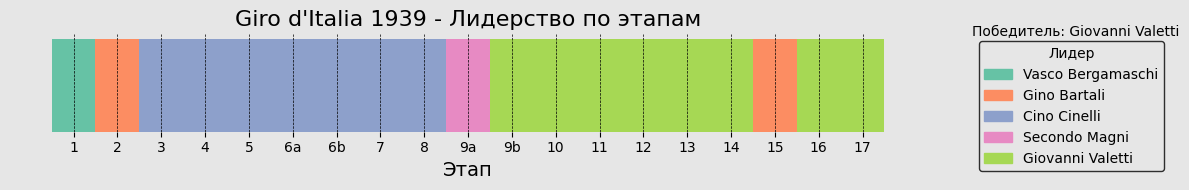

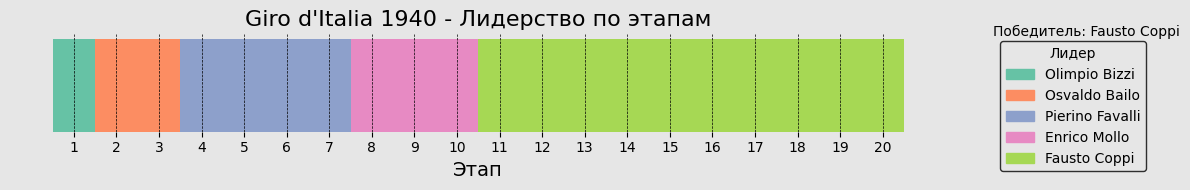

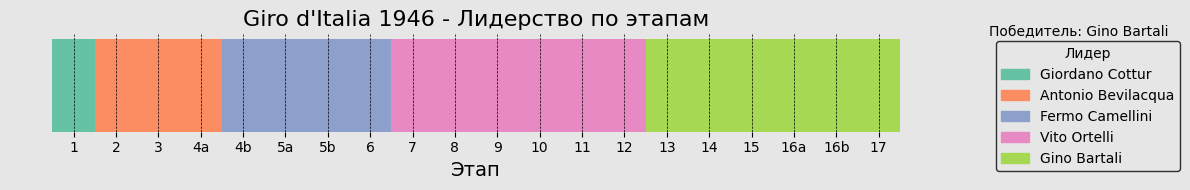

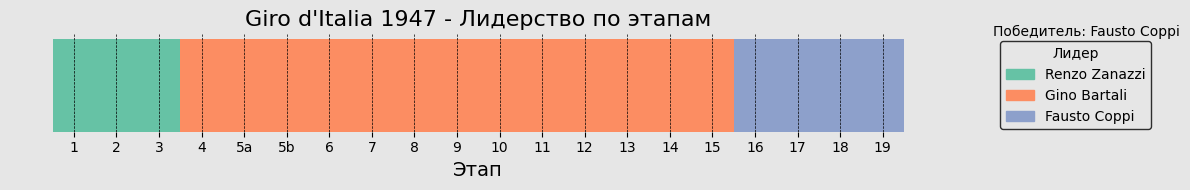

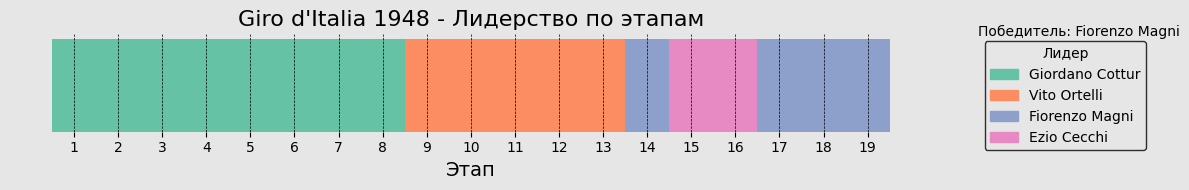

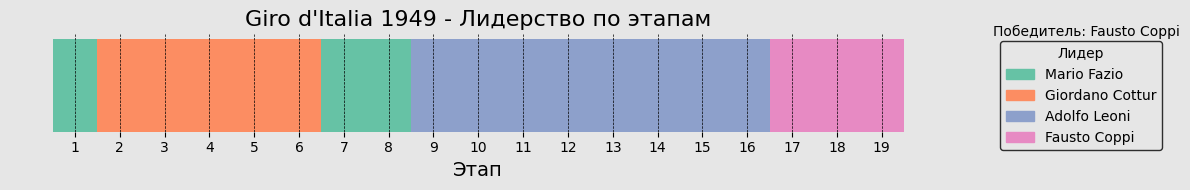

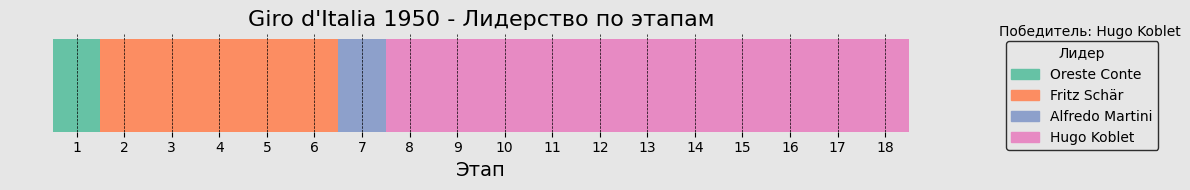

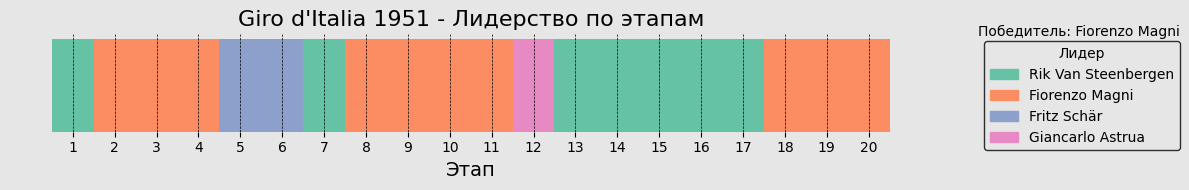

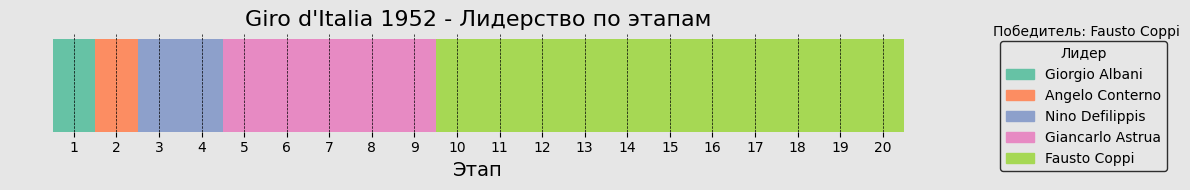

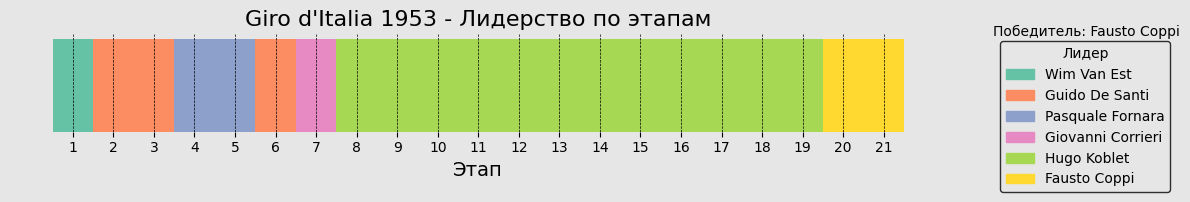

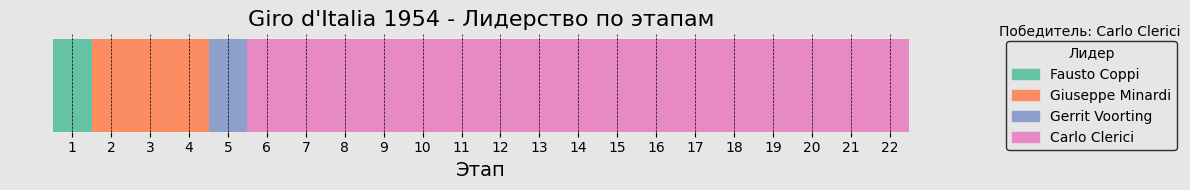

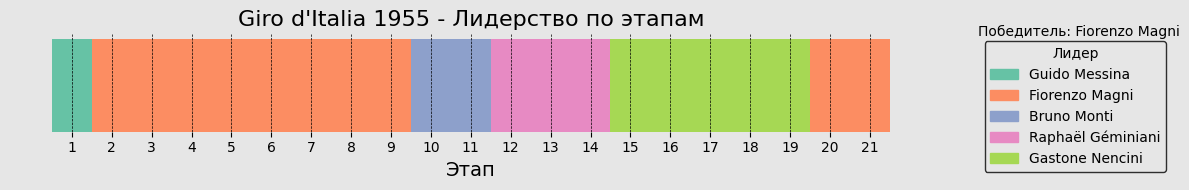

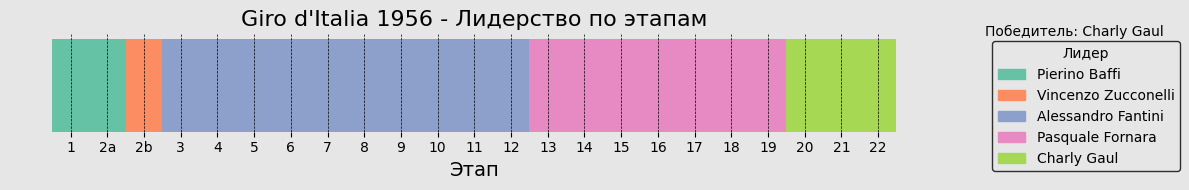

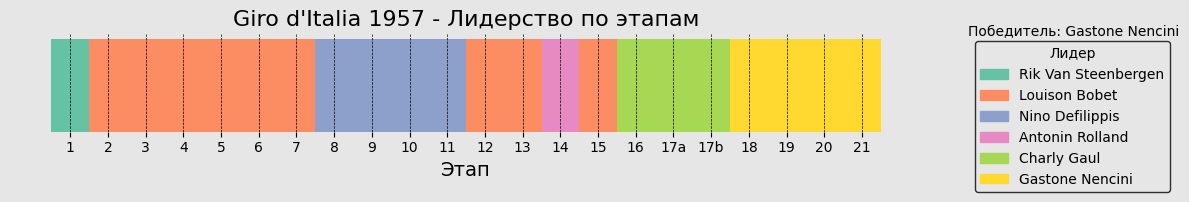

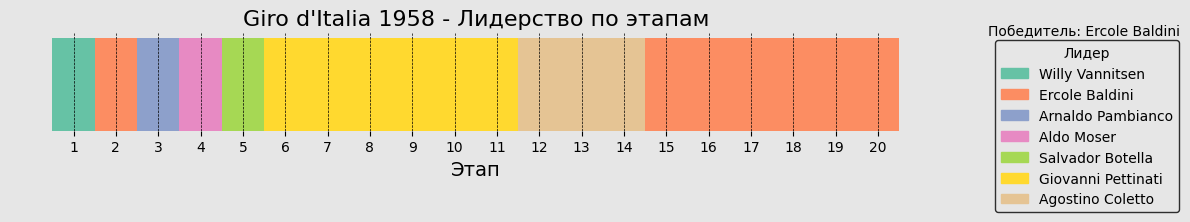

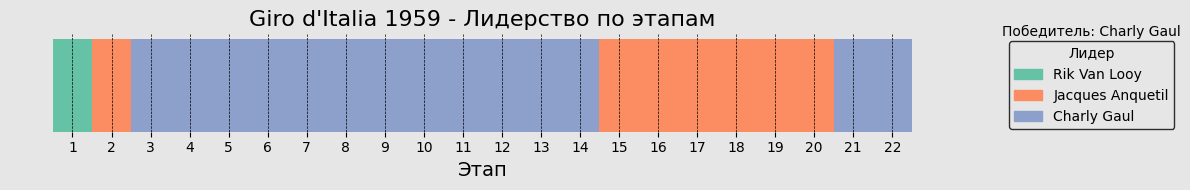

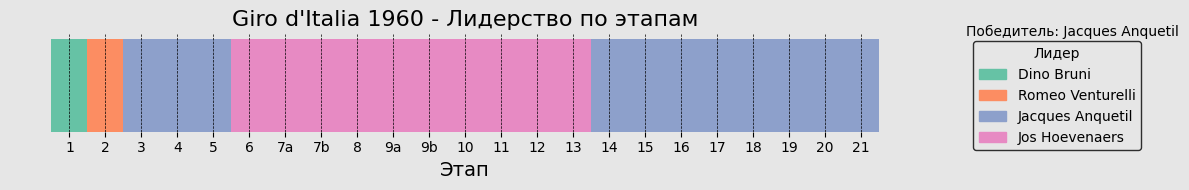

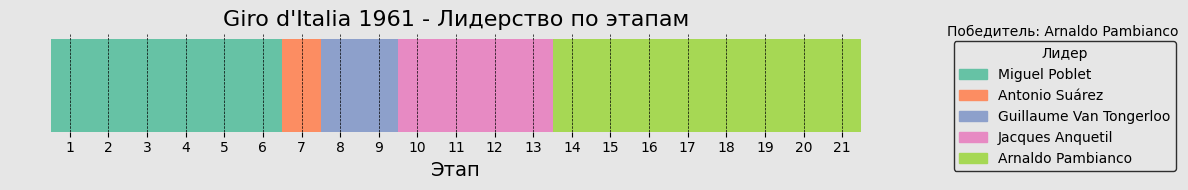

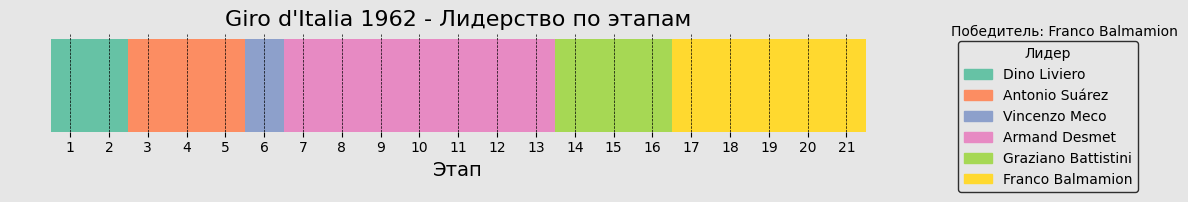

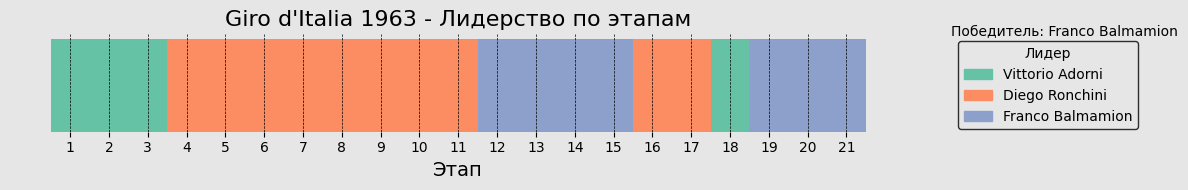

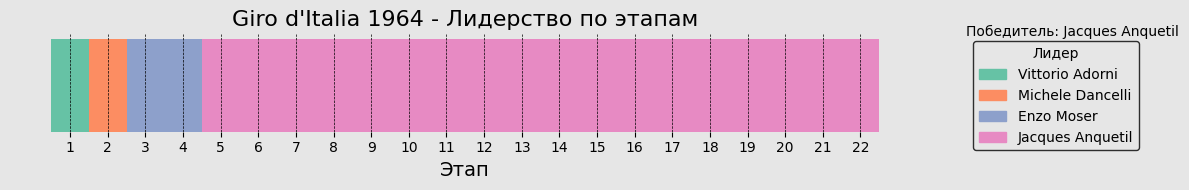

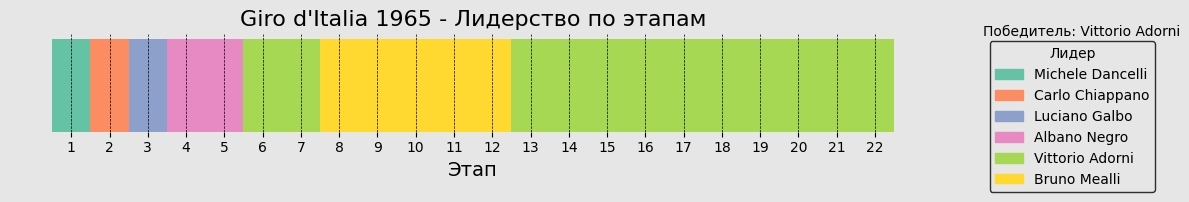

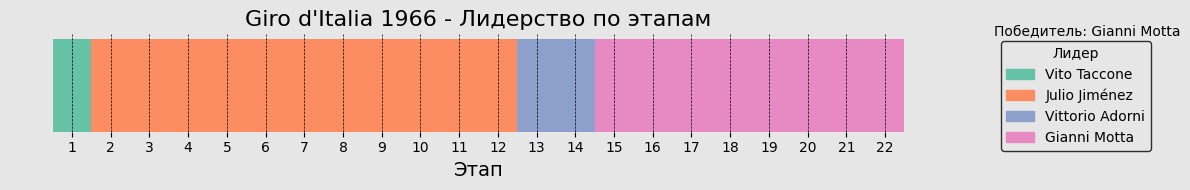

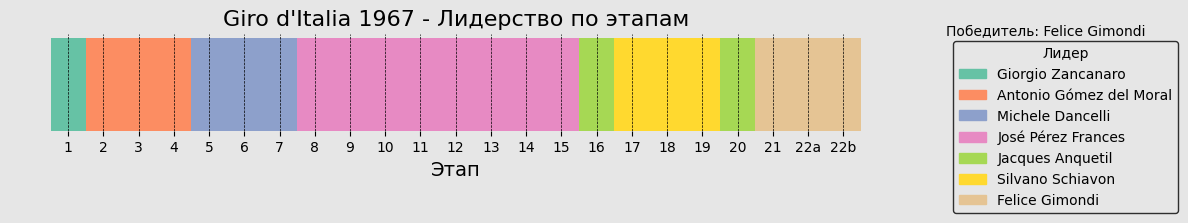

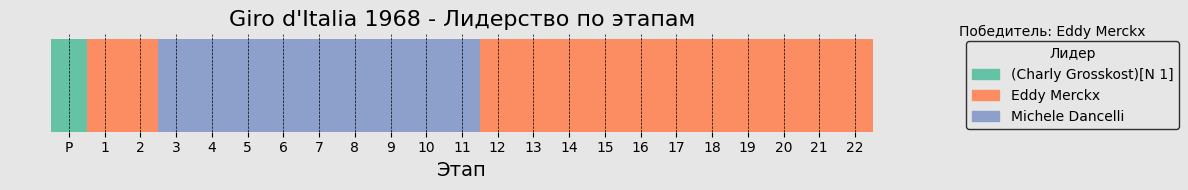

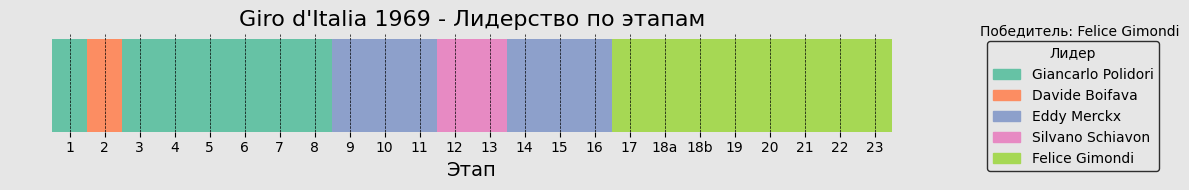

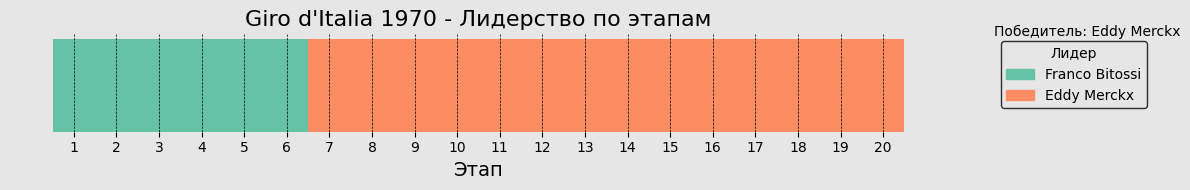

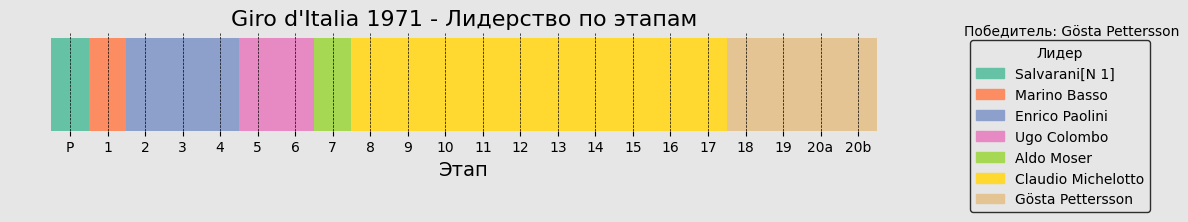

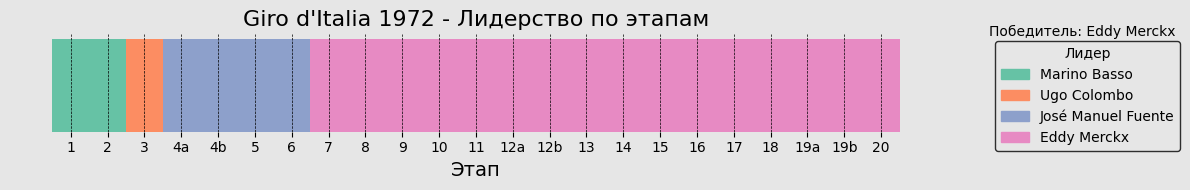

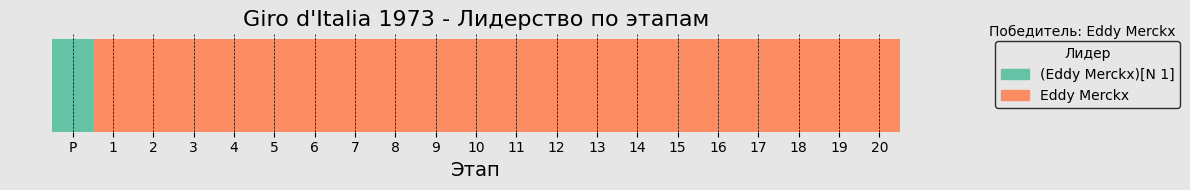

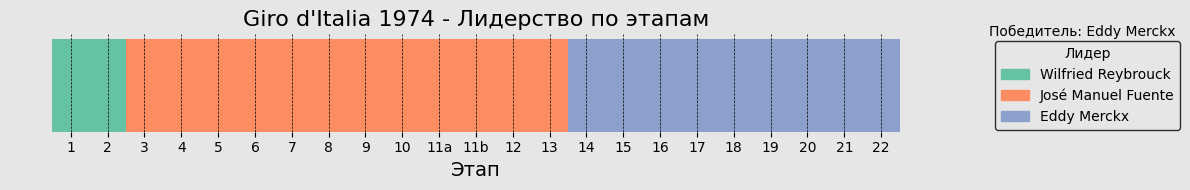

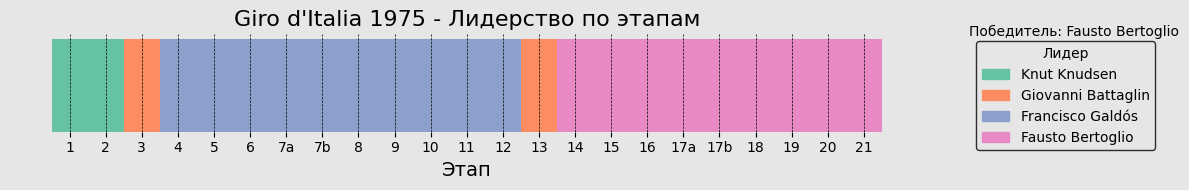

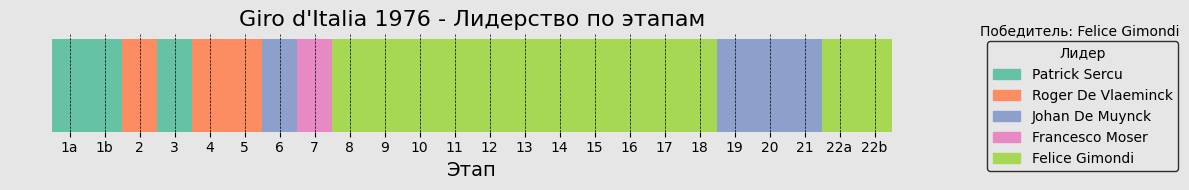

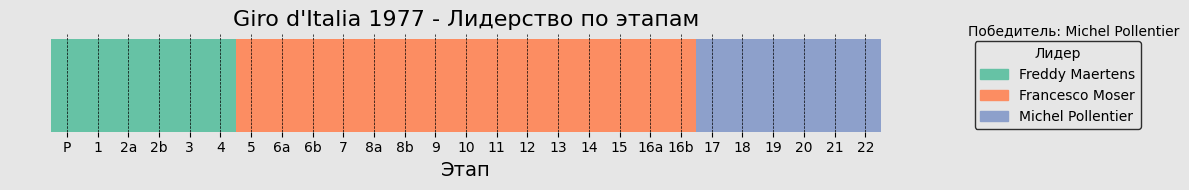

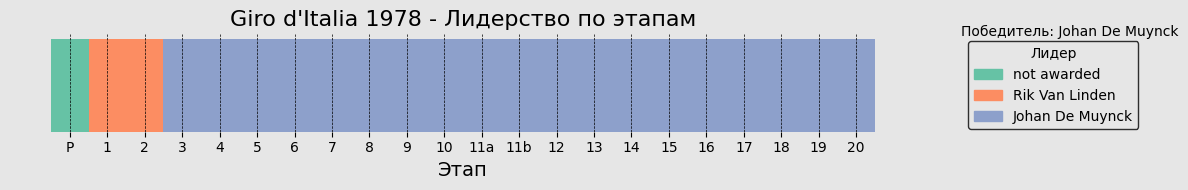

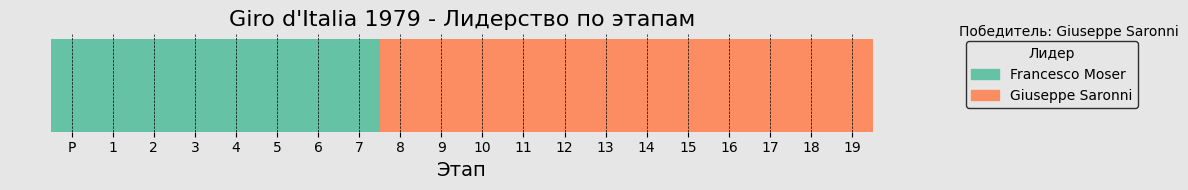

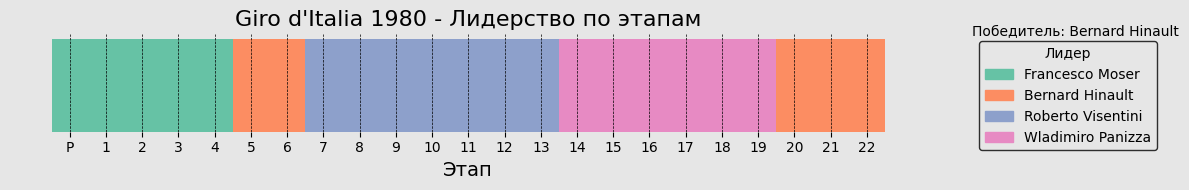

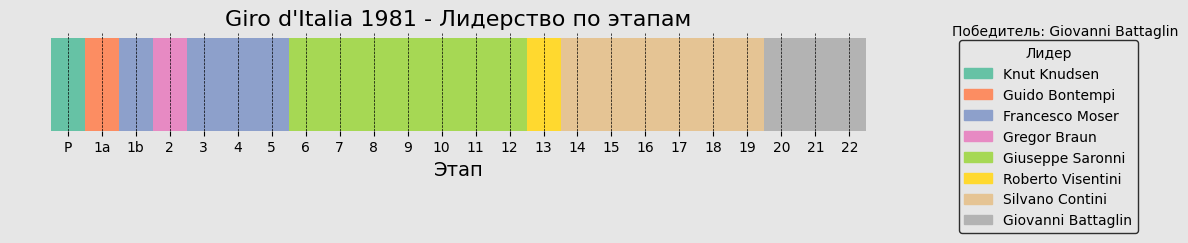

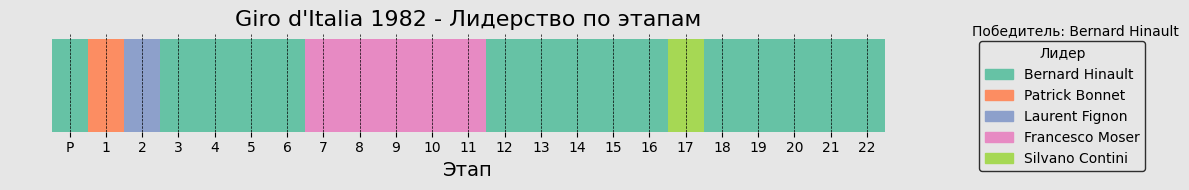

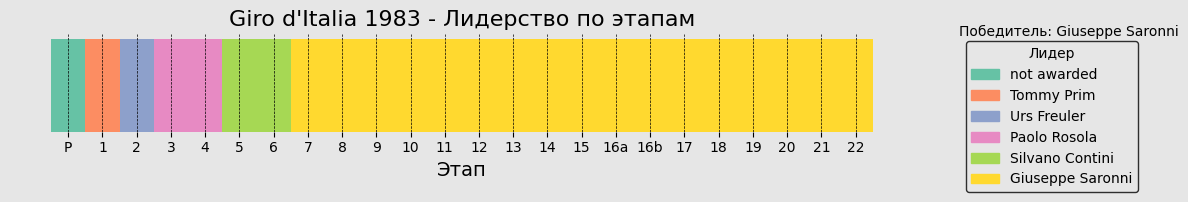

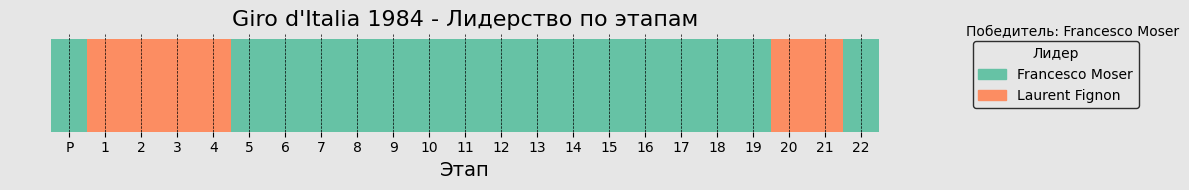

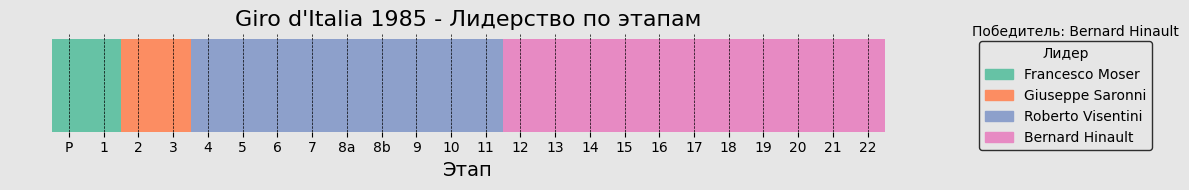

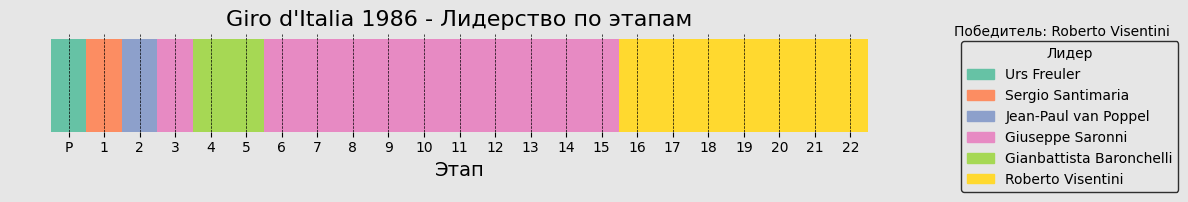

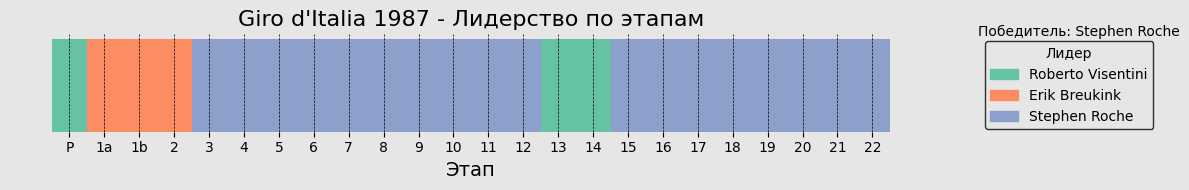

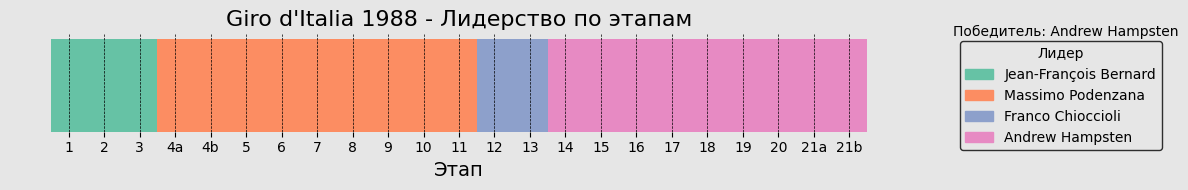

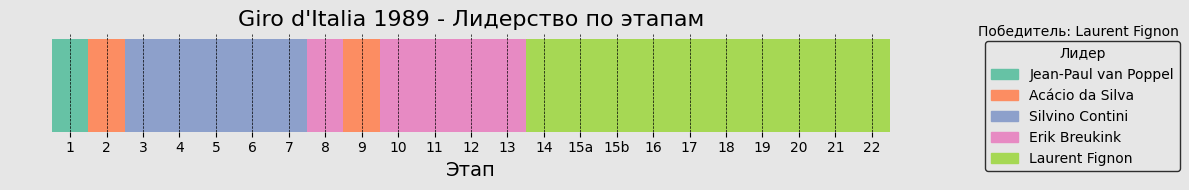

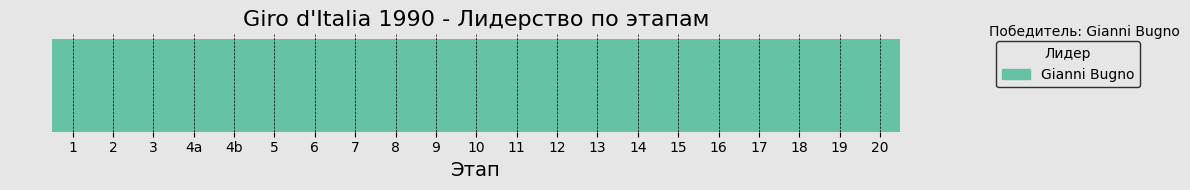

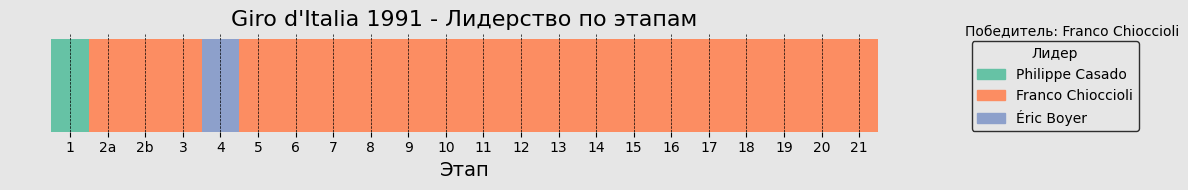

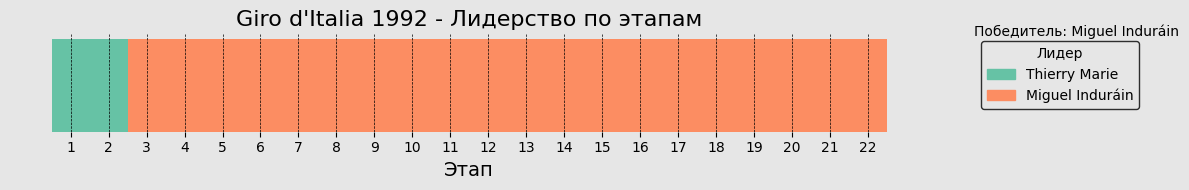

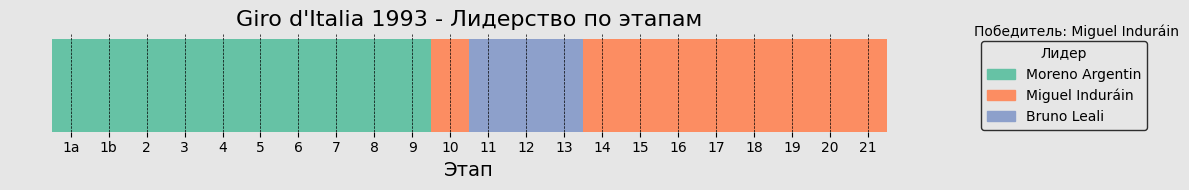

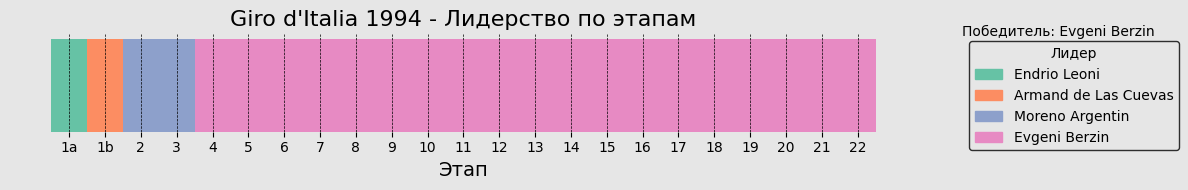

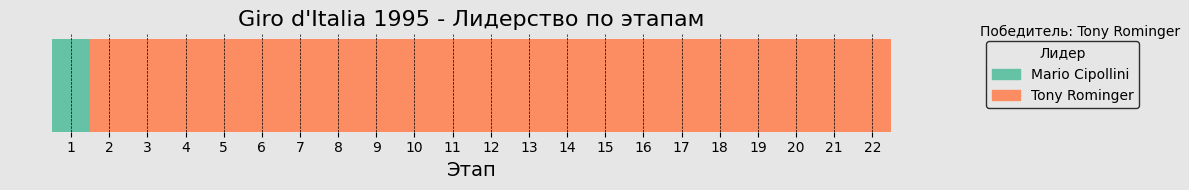

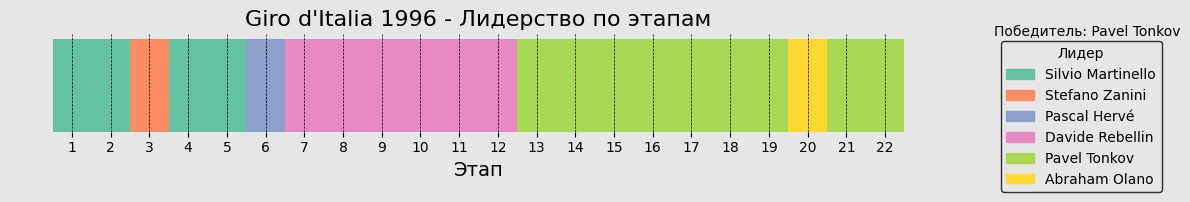

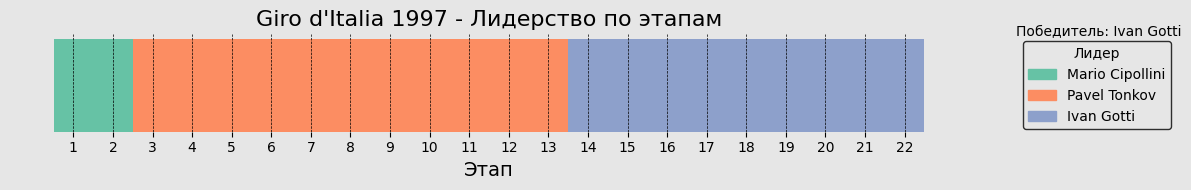

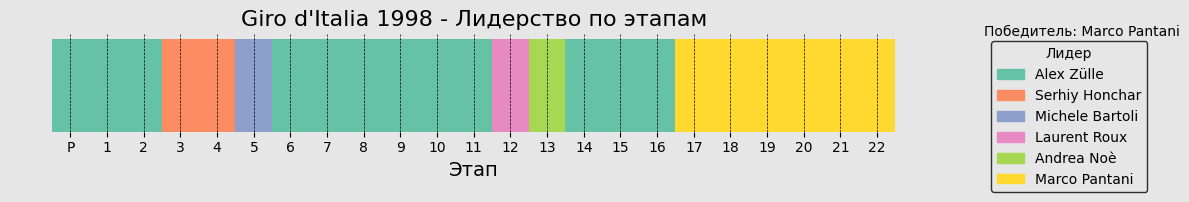

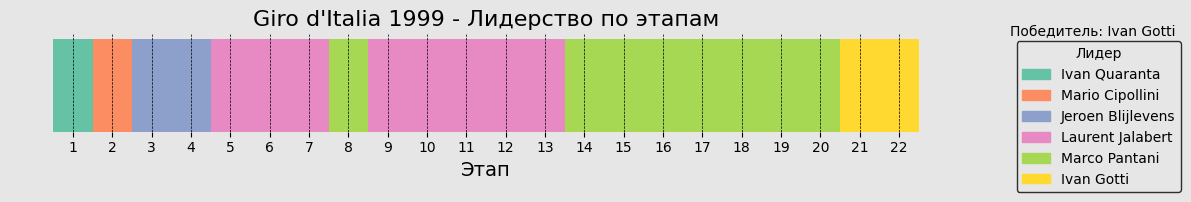

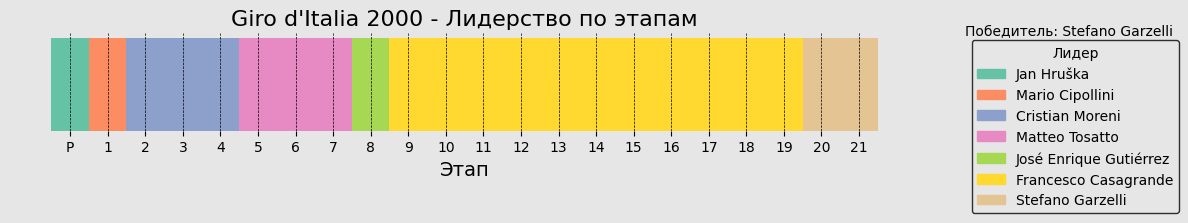

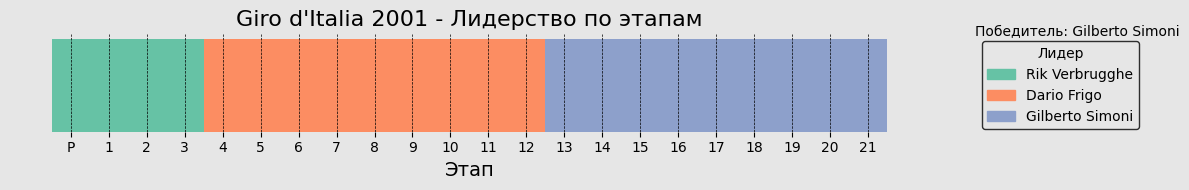

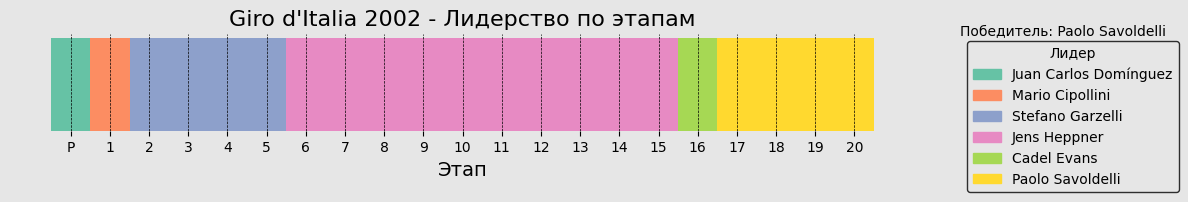

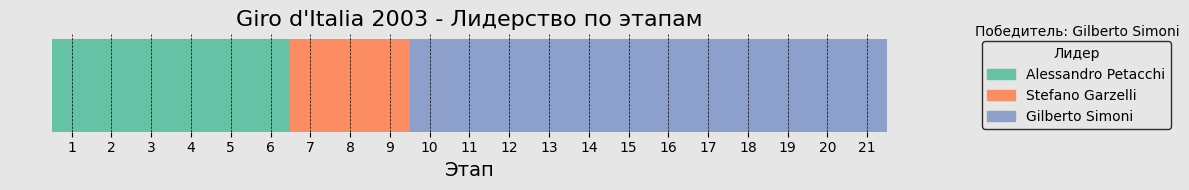

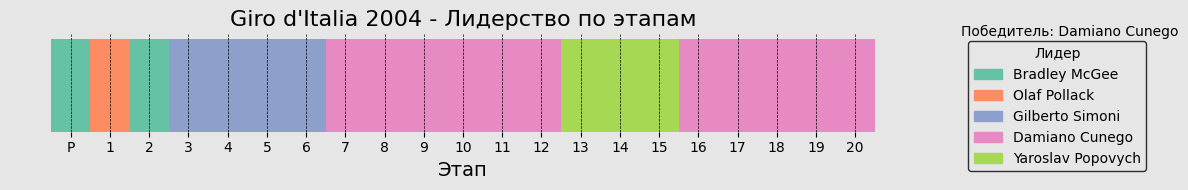

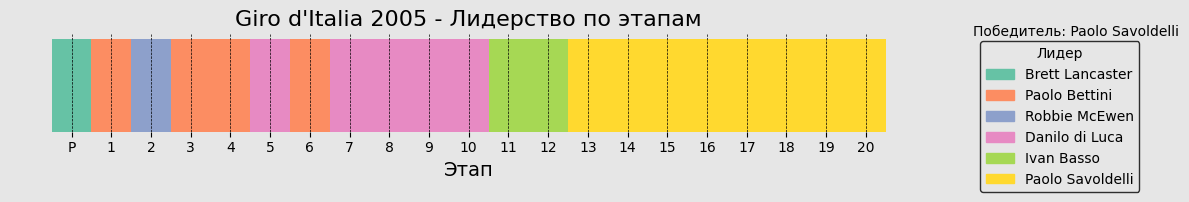

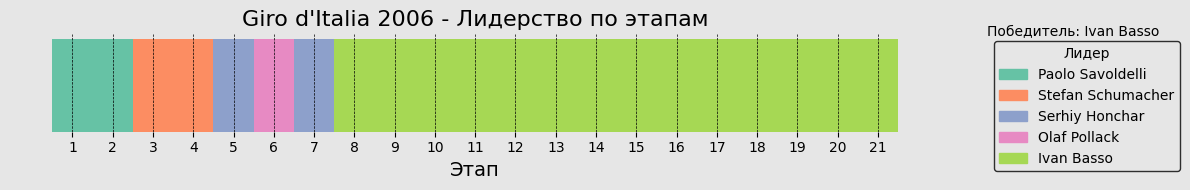

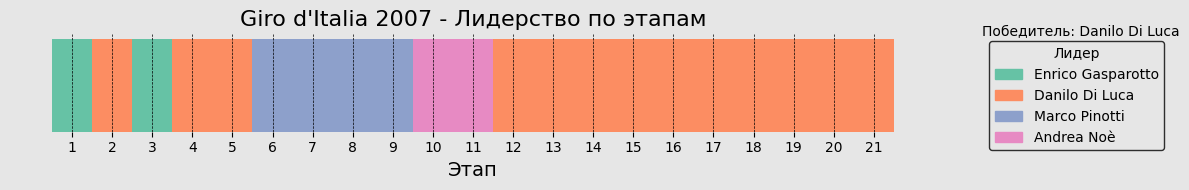

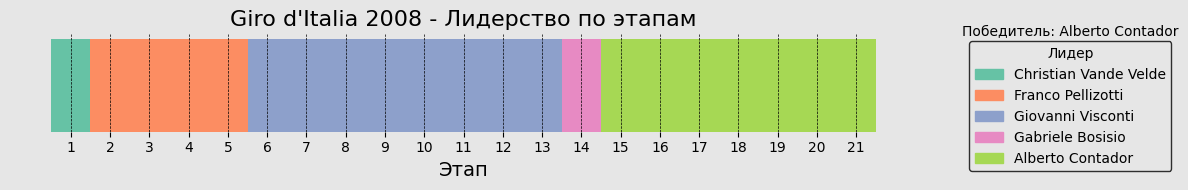

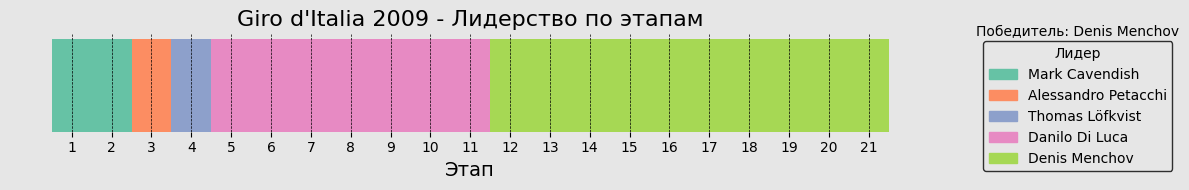

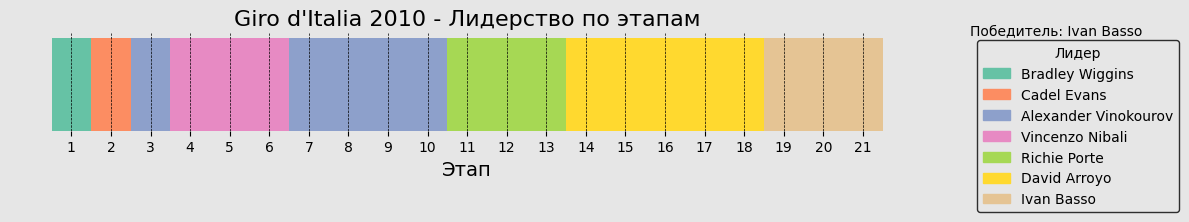

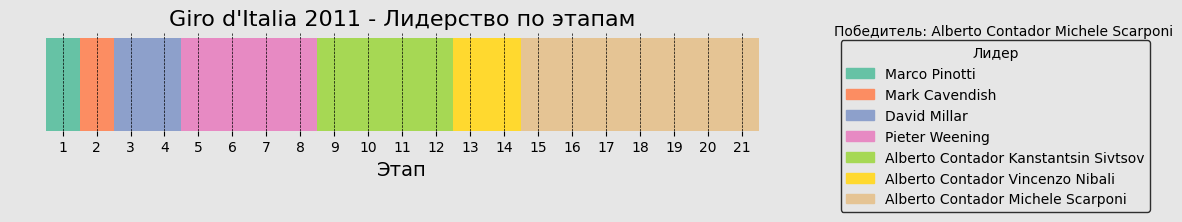

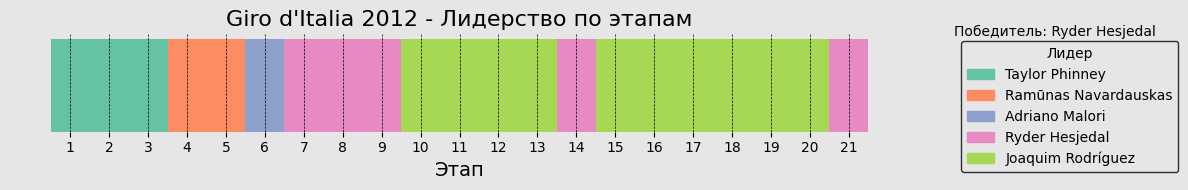

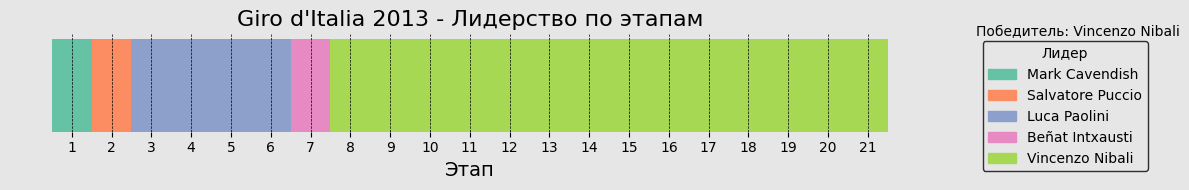

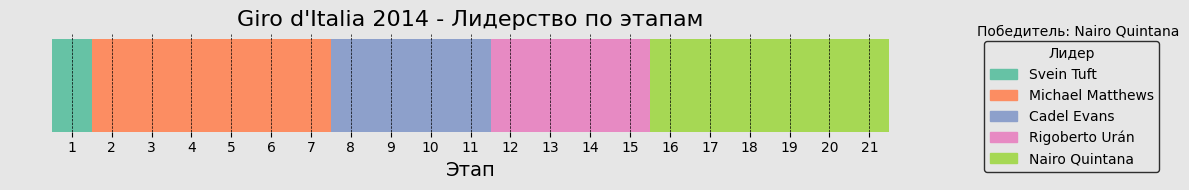

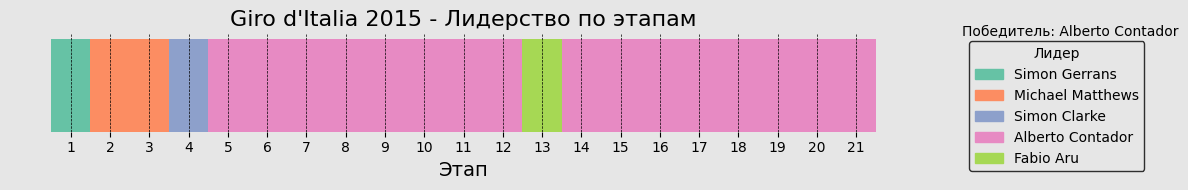

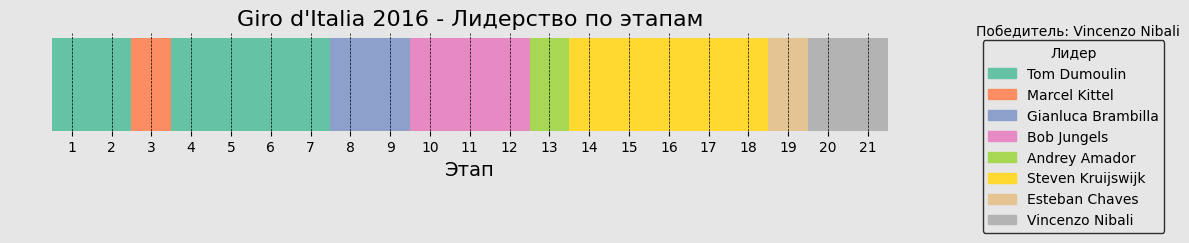

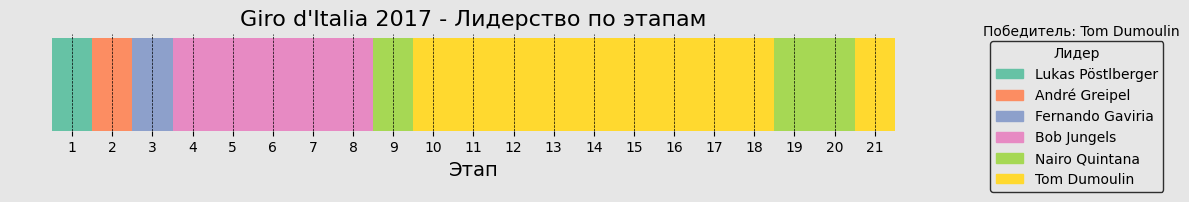

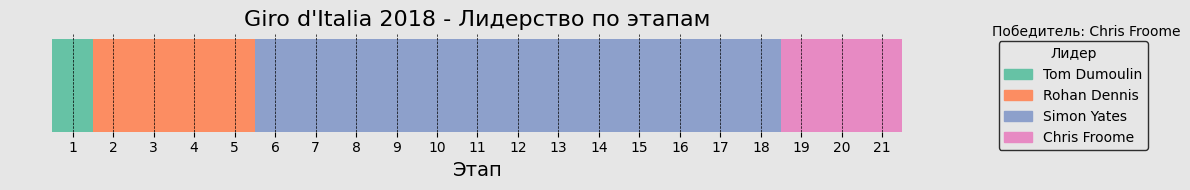

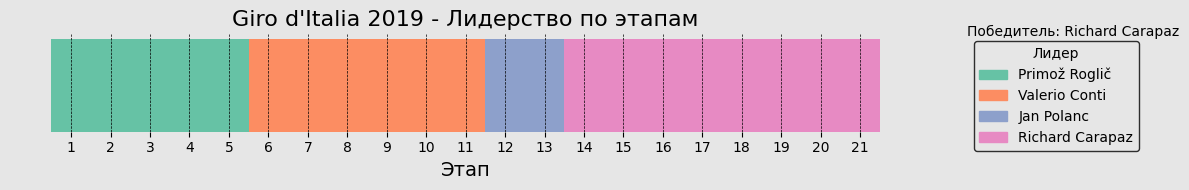

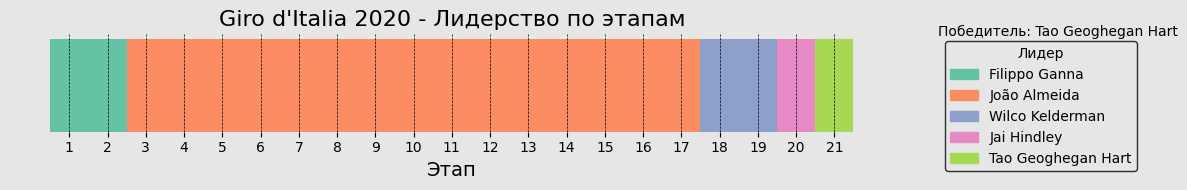

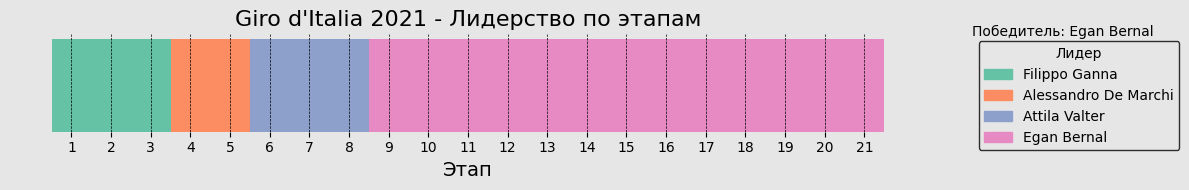

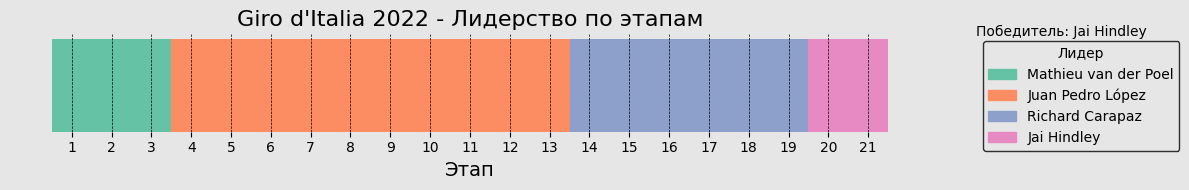

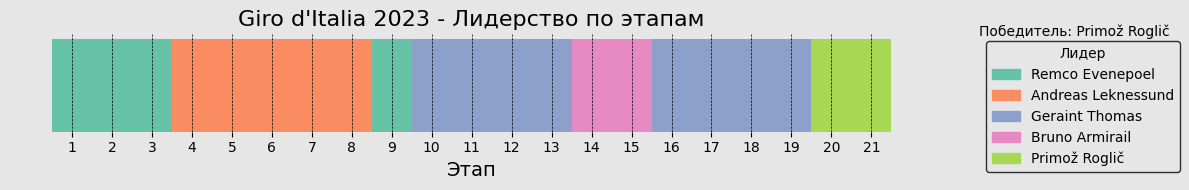

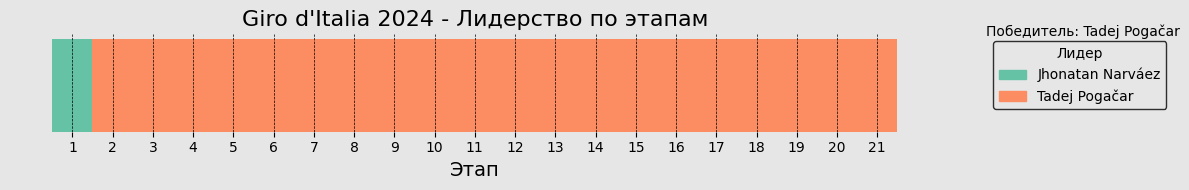

In [13]:
for year in d:
    plot_leadership_timeline(df_gen, int(year))
#plot_leadership_timeline(df_gen, 1932)

### 2. Decisive round

In [71]:
df_des = df[['Year', 'Stage', 'Winner', 'General classification']]
df_des['Year'] = df_des['Year'].astype(int)
df_des

C:\Users\bemyp\AppData\Local\Temp\ipykernel_6440\309067006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_des['Year'] = df_des['Year'].astype(int)


,Year,Stage,Winner,General classification
0,1932,1,Learco Guerra,Learco Guerra
1,1932,2,Hermann Buse,Hermann Buse
2,1932,3,Fabio Battesini,Hermann Buse
3,1932,4,Learco Guerra,Hermann Buse
4,1932,5,Raffaele Di Paco,Hermann Buse
...,...,...,...,...
1970,2024,18,Tim Merlier,Tadej Pogačar
1971,2024,19,Andrea Vendrame,Tadej Pogačar
1972,2024,20,Tadej Pogačar,Tadej Pogačar
1973,2024,21,Tim Merlier,Tadej Pogačar


In [72]:
df_des[df_des['Stage'] == 'Final']

,Year,Stage,Winner,General classification
13,1932,Final,Final,Antonio Pesenti
31,1933,Final,Final,Alfredo Binda
49,1934,Final,Final,Learco Guerra
70,1935,Final,Final,Vasco Bergamaschi
92,1936,Final,Final,Gino Bartali
...,...,...,...,...
1886,2020,Final,Final,Tao Geoghegan Hart
1908,2021,Final,Final,Egan Bernal
1930,2022,Final,Final,Jai Hindley
1952,2023,Final,Final,Primož Roglič


In [73]:

def first_stage_won(df_des):
    winners_by_year = df_des[df_des['Stage'] == 'Final'][['Year', 'General classification']]
    results = {}

    for _, row in winners_by_year.iterrows():
        year = row['Year']
        winner = row['General classification']

        winner_stages = df_des[(df_des['Year'] == year) & (df_des['General classification'] == winner)]

        first_stage = re.sub(r'\D', '', winner_stages['Stage'].iloc[0])
        if first_stage == '':
            first_stage = 0

        results[year] = (winner, first_stage)

    return results


In [74]:
first_stage_won(df_des)

{1932: ('Antonio Pesenti', '7'),
 1933: ('Alfredo Binda', '2'),
 1934: ('Learco Guerra', '4'),
 1935: ('Vasco Bergamaschi', '1'),
 1936: ('Gino Bartali', '9'),
 1937: ('Gino Bartali', '5'),
 1938: ('Giovanni Valetti', '9'),
 1939: ('Giovanni Valetti', '9'),
 1940: ('Fausto Coppi', '11'),
 1946: ('Gino Bartali', '13'),
 1947: ('Fausto Coppi', '16'),
 1948: ('Fiorenzo Magni', '14'),
 1949: ('Fausto Coppi', '17'),
 1950: ('Hugo Koblet', '8'),
 1951: ('Fiorenzo Magni', '2'),
 1952: ('Fausto Coppi', '10'),
 1953: ('Fausto Coppi', '20'),
 1954: ('Carlo Clerici', '6'),
 1955: ('Fiorenzo Magni', '2'),
 1956: ('Charly Gaul', '20'),
 1957: ('Gastone Nencini', '18'),
 1958: ('Ercole Baldini', '2'),
 1959: ('Charly Gaul', '3'),
 1960: ('Jacques Anquetil', '3'),
 1961: ('Arnaldo Pambianco', '14'),
 1962: ('Franco Balmamion', '17'),
 1963: ('Franco Balmamion', '12'),
 1964: ('Jacques Anquetil', '5'),
 1965: ('Vittorio Adorni', '6'),
 1966: ('Gianni Motta', '15'),
 1967: ('Felice Gimondi', '21'),
 19

C:\Users\bemyp\AppData\Local\Temp\ipykernel_6440\200759679.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab20b', num_colors)  # Using tab20b for better distinct colors


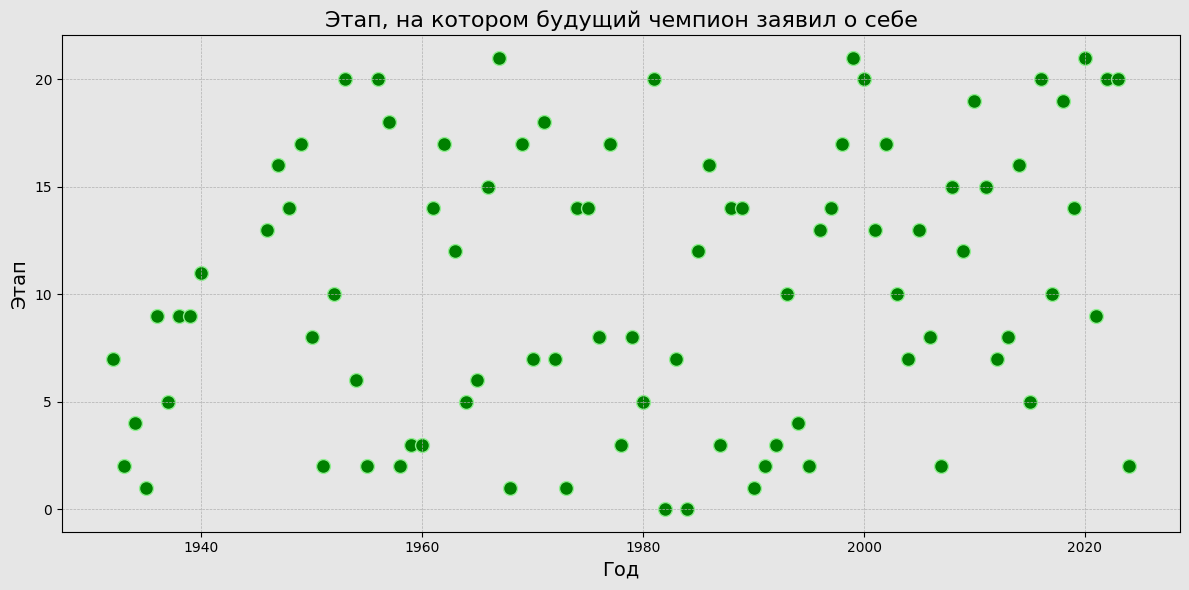

In [84]:
plt.rcParams.update({
    'figure.facecolor': '#e6e6e6',
    'axes.facecolor': '#e6e6e6',
    'savefig.facecolor': '#e6e6e6'
})
def plot_first_win(df_des):
    first_wins = first_stage_won(df_des)

    years = list(first_wins.keys())
    stages = [int(first_win[1]) for first_win in first_wins.values()]  # Convert stage to integer for y-axis

    # Generate a color map with as many distinct colors as there are winners
    unique_winners = list(first_wins.values())
    num_colors = len(unique_winners)
    color_map = cm.get_cmap('tab20b', num_colors)  # Using tab20b for better distinct colors

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot each winner with a different color
    for idx, (year, (winner, stage)) in enumerate(first_wins.items()):
        plt.scatter(year, int(stage), color='green', edgecolor='lightgreen', s=100)

    # Set plot labels and title
    plt.xlabel('Год', fontsize=14)
    plt.ylabel('Этап', fontsize=14)
    plt.title('Этап, на котором будущий чемпион заявил о себе', fontsize=16)

    # Display grid
    plt.grid(True, linestyle='--', linewidth=0.5)

    # Layout and saving
    plt.tight_layout()
    plt.savefig('graphs/first_win_plot_colored_distinct.png', format='png', dpi=300)
    plt.show()

# Example usage
plot_first_win(df_des)


In [85]:
def stages_held_lead(df_des):
    winners_by_year = df_des[df_des['Stage'] == 'Final'][['Year', 'General classification']]
    results = {}

    for _, row in winners_by_year.iterrows():
        year = row['Year']
        winner = row['General classification']


        # Find the stages where the winner held the leadership
        winner_stages = df_des[(df_des['Year'] == year) & (df_des['General classification'] == winner)]

        # Count the number of stages the winner held the leadership
        leadership_count = winner_stages.shape[0] - 1

        results[year] = leadership_count

    return results

In [86]:
stages_held_lead(df_des)

{1932: 7,
 1933: 13,
 1934: 12,
 1935: 15,
 1936: 13,
 1937: 16,
 1938: 11,
 1939: 8,
 1940: 10,
 1946: 6,
 1947: 4,
 1948: 4,
 1949: 3,
 1950: 11,
 1951: 10,
 1952: 11,
 1953: 2,
 1954: 17,
 1955: 10,
 1956: 3,
 1957: 4,
 1958: 7,
 1959: 14,
 1960: 11,
 1961: 8,
 1962: 5,
 1963: 7,
 1964: 18,
 1965: 12,
 1966: 8,
 1967: 3,
 1968: 13,
 1969: 8,
 1970: 14,
 1971: 4,
 1972: 16,
 1973: 20,
 1974: 9,
 1975: 9,
 1976: 13,
 1977: 6,
 1978: 19,
 1979: 12,
 1980: 5,
 1981: 3,
 1982: 15,
 1983: 17,
 1984: 17,
 1985: 11,
 1986: 7,
 1987: 18,
 1988: 9,
 1989: 10,
 1990: 21,
 1991: 20,
 1992: 20,
 1993: 9,
 1994: 19,
 1995: 21,
 1996: 9,
 1997: 9,
 1998: 6,
 1999: 2,
 2000: 2,
 2001: 9,
 2002: 4,
 2003: 12,
 2004: 11,
 2005: 8,
 2006: 14,
 2007: 13,
 2008: 7,
 2009: 10,
 2010: 3,
 2011: 7,
 2012: 5,
 2013: 14,
 2014: 6,
 2015: 16,
 2016: 2,
 2017: 10,
 2018: 3,
 2019: 8,
 2020: 1,
 2021: 13,
 2022: 2,
 2023: 2,
 2024: 20}

In [87]:
def count_stages_per_year(df_des):
    # Group the DataFrame by 'Year' and count unique stages for each year
    stages_count = df_des.groupby('Year')['Stage'].nunique() - 1

    return stages_count

# Example usage
stages_per_year = count_stages_per_year(df_des)
print(stages_per_year)

Year
1932    13
1933    17
1934    17
1935    20
1936    21
        ..
2020    21
2021    21
2022    21
2023    21
2024    21
Name: Stage, Length: 88, dtype: int64


In [98]:
import matplotlib.pyplot as plt
import numpy as np

def plot_stages_held_lead_percentage(df_des):
    #plt.style.use('dark_background')

    # Get the number of stages each winner held leadership
    stages_held = stages_held_lead(df_des)
    # Get the number of stages for each year
    stages_count = count_stages_per_year(df_des)

    # Calculate the percentage of stages held leadership
    percentages = {year: (stages_held[year] / stages_count[year]) * 100 for year in stages_held}

    years = list(percentages.keys())
    stage_percentages = list(percentages.values())

    # Create the plot
    plt.figure(figsize=(12, 6))

    colors = plt.cm.viridis(np.linspace(0, 1, len(years)))  # Use a colormap (viridis)

    plt.bar(years, stage_percentages, color='green', edgecolor='green')

    # Set plot labels and title
    plt.xlabel('Год', fontsize=14, color='black')
    plt.ylabel('Процент этапов, %', fontsize=14, color='black')
    plt.title('Количество этапов, в которых лидировал будущий победитель, в процентах', fontsize=16, color='black')

    # Customize the y-ticks to be at intervals of 5
    plt.yticks(np.arange(0, 101, 20), fontsize=12, color='black')

    # Display grid
    plt.grid(True, linestyle='--', linewidth=0.5, color='black')

    # Layout and saving
    plt.tight_layout()

    # Save the plot
    plt.savefig('graphs/stages_held_leadership_percentage_plot.png', format='png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()


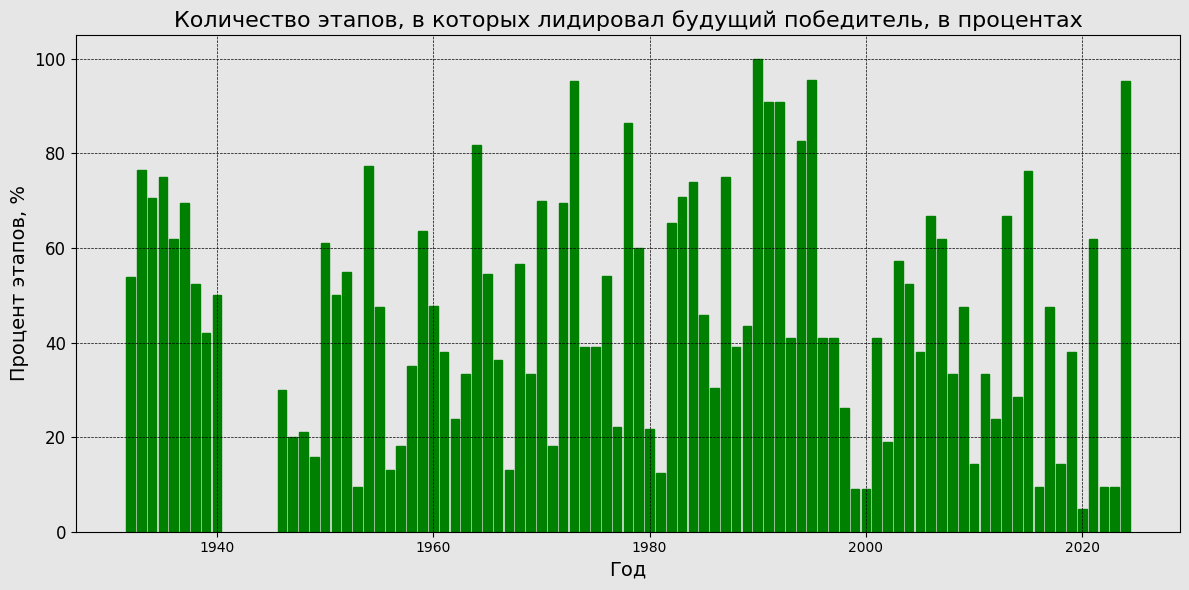

In [99]:
plot_stages_held_lead_percentage(df_des)

In [116]:
def leader_most_without_winning(df_des):
    leaders_without_win = {}

    # Group the DataFrame by Year and iterate over each year
    for year, group in df_des.groupby('Year'):
        # Get the winner of the year
        winner = group[group['Stage'] == 'Final']['General classification'].iloc[0]

        # Find out the leader for each stage
        stage_leaders = group['General classification'].value_counts()

        # Remove the winner from the list of stage leaders
        if winner in stage_leaders:
            stage_leaders = stage_leaders.drop(winner)

        # If the winner was the only one leading, skip or mark as "No other leader"
        if stage_leaders.empty:
            leaders_without_win[year] = 0
        else:
            # Get the leader with the most stages (not including the winner)
            leader_most = stage_leaders.idxmax()  # Leader with the most stages
            num_stages = stage_leaders.max()  # Number of stages the leader led
            leaders_without_win[year] = int(num_stages)

    return leaders_without_win

In [117]:
leader_most_without_winning(df_des)

{1932: 5,
 1933: 3,
 1934: 4,
 1935: 2,
 1936: 4,
 1937: 5,
 1938: 8,
 1939: 7,
 1940: 4,
 1946: 6,
 1947: 13,
 1948: 8,
 1949: 8,
 1950: 5,
 1951: 7,
 1952: 5,
 1953: 12,
 1954: 3,
 1955: 5,
 1956: 10,
 1957: 9,
 1958: 6,
 1959: 7,
 1960: 10,
 1961: 6,
 1962: 7,
 1963: 10,
 1964: 2,
 1965: 5,
 1966: 11,
 1967: 8,
 1968: 9,
 1969: 7,
 1970: 6,
 1971: 10,
 1972: 4,
 1973: 1,
 1974: 12,
 1975: 10,
 1976: 4,
 1977: 15,
 1978: 2,
 1979: 8,
 1980: 7,
 1981: 7,
 1982: 5,
 1983: 2,
 1984: 6,
 1985: 9,
 1986: 11,
 1987: 3,
 1988: 9,
 1989: 5,
 1990: 0,
 1991: 1,
 1992: 2,
 1993: 10,
 1994: 2,
 1995: 1,
 1996: 6,
 1997: 11,
 1998: 12,
 1999: 8,
 2000: 11,
 2001: 9,
 2002: 10,
 2003: 6,
 2004: 4,
 2005: 5,
 2006: 2,
 2007: 4,
 2008: 8,
 2009: 7,
 2010: 5,
 2011: 4,
 2012: 10,
 2013: 4,
 2014: 6,
 2015: 2,
 2016: 6,
 2017: 5,
 2018: 13,
 2019: 6,
 2020: 15,
 2021: 3,
 2022: 10,
 2023: 8,
 2024: 1}

In [122]:
def plot_leader_most_without_winning(df_des):
    #plt.style.use('dark_background')

    # Get the leader who led the most stages without winning
    leaders_held = leader_most_without_winning(df_des)
    # Get the number of stages for each year
    stages_count = count_stages_per_year(df_des)
    print(leaders_held[2000], stages_count[2000])

    # Calculate the percentage of stages held leadership
    percentages = {year: (leaders_held[year] / stages_count[year]) * 100 for year in leaders_held}

    years = list(percentages.keys())
    stage_percentages = list(percentages.values())

    #years = list(leaders.keys())
    #leader_names = [leader[0] for leader in leaders.values()]
    #stages_led = [leader[1] for leader in leaders.values()]

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Assign colors to each leader using a colormap
    #unique_leaders = list(set(leader_names))
    #colors = plt.cm.tab20(np.linspace(0, 1, len(unique_leaders)))

    #leader_color_map = {leader: colors[i] for i, leader in enumerate(unique_leaders)}
    #leader_colors = [leader_color_map[leader] if leader != "No other leader" else 'gray' for leader in leader_names]

    plt.bar(years, stage_percentages, color='green', edgecolor='green')

    # Annotate each bar with the leader's name and the number of stages
    # for i, (year, (leader, num_stages)) in enumerate(leaders.items()):
    #     if leader != "No other leader":
    #         plt.text(year, stages_led[i] + 0.1, f"{leader} ({num_stages} stages)", ha='center', va='bottom', fontsize=10, color='white')
    #     else:
    #         plt.text(year, stages_led[i] + 0.1, f"No other leader", ha='center', va='bottom', fontsize=10, color='white')

    # Set plot labels and title
    plt.xlabel('Год', fontsize=14, color='black')
    plt.ylabel('Процент этапов, %', fontsize=14, color='black')
    plt.title('Гонщик, лидировавший часть гонки, но её не выигравший', fontsize=16, color='black')

    # Display grid
    plt.grid(True, linestyle='--', linewidth=0.5, color='black')

    # Layout and saving
    plt.tight_layout()

    # Save the plot
    plt.savefig('graphs/leader_most_without_winning_plot.png', format='png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

11 22


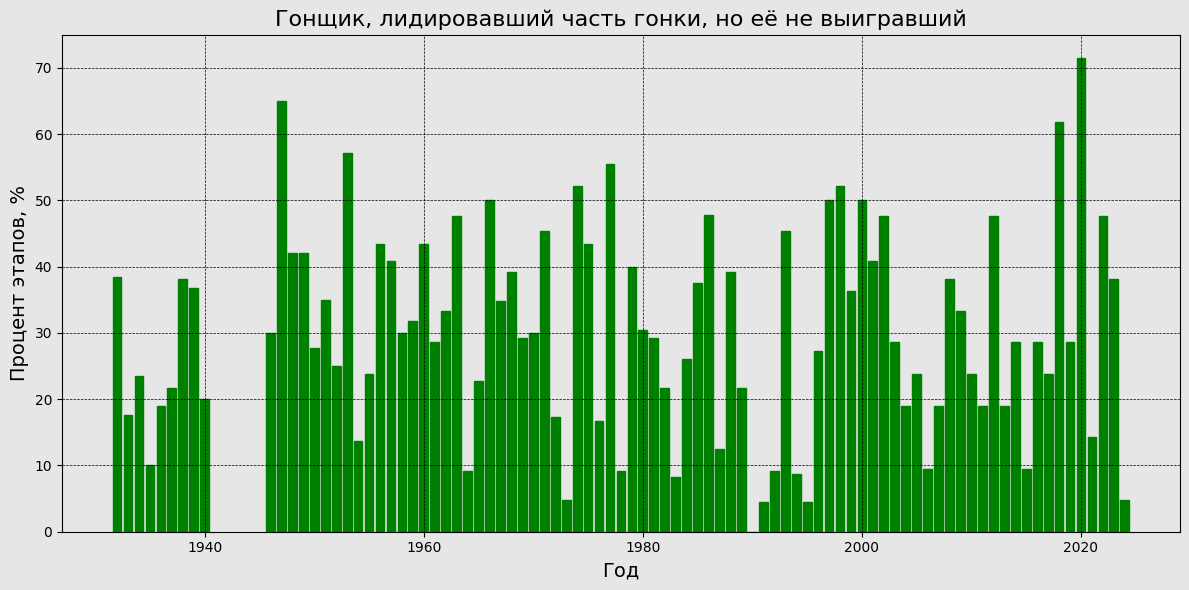

In [123]:
plot_leader_most_without_winning(df_des)